# Machine learning in medicine: a practical introduction to techniques for data pre-processing, hyperparameter tuning, and model comparison

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
from sklearn.datasets import load_breast_cancer

In [68]:
data=load_breast_cancer()
df_features=pd.DataFrame(data.data,columns=data.feature_names)
df_features.head(3).T

,0,1,2
mean radius,17.990000,20.570000,19.690000
mean texture,10.380000,17.770000,21.250000
mean perimeter,122.800000,132.900000,130.000000
mean area,1001.000000,1326.000000,1203.000000
mean smoothness,0.118400,0.084740,0.109600
mean compactness,0.277600,0.078640,0.159900
mean concavity,0.300100,0.086900,0.197400
mean concave points,0.147100,0.070170,0.127900
mean symmetry,0.241900,0.181200,0.206900
mean fractal dimension,0.078710,0.056670,0.059990


In [69]:
df_target=pd.DataFrame(data=data.target,columns=["target"])
df_target.head()


,target
0,0
1,0
2,0
3,0
4,0


In [70]:
data.target_names   # target variables

array(['malignant', 'benign'], dtype='<U9')

In [71]:
df = pd.merge(df_features, df_target, left_index=True, right_index=True, how='outer')


In [72]:
df_features.axes

[RangeIndex(start=0, stop=569, step=1),
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object')]

In [73]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


([<matplotlib.axis.XTick at 0x1b6c25415d0>,
 [Text(0, 0, 'malignant'), Text(1, 0, 'benign')])

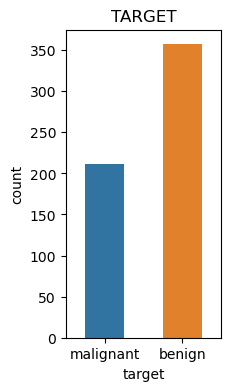

In [77]:
plt.figure(figsize=(2,4))
sns.countplot(data=df,x=df["target"], width=0.5)
plt.title("TARGET")
plt.xticks(ticks=[0, 1], labels=['malignant', 'benign'])

In [78]:
df.groupby("target").mean().T


target,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


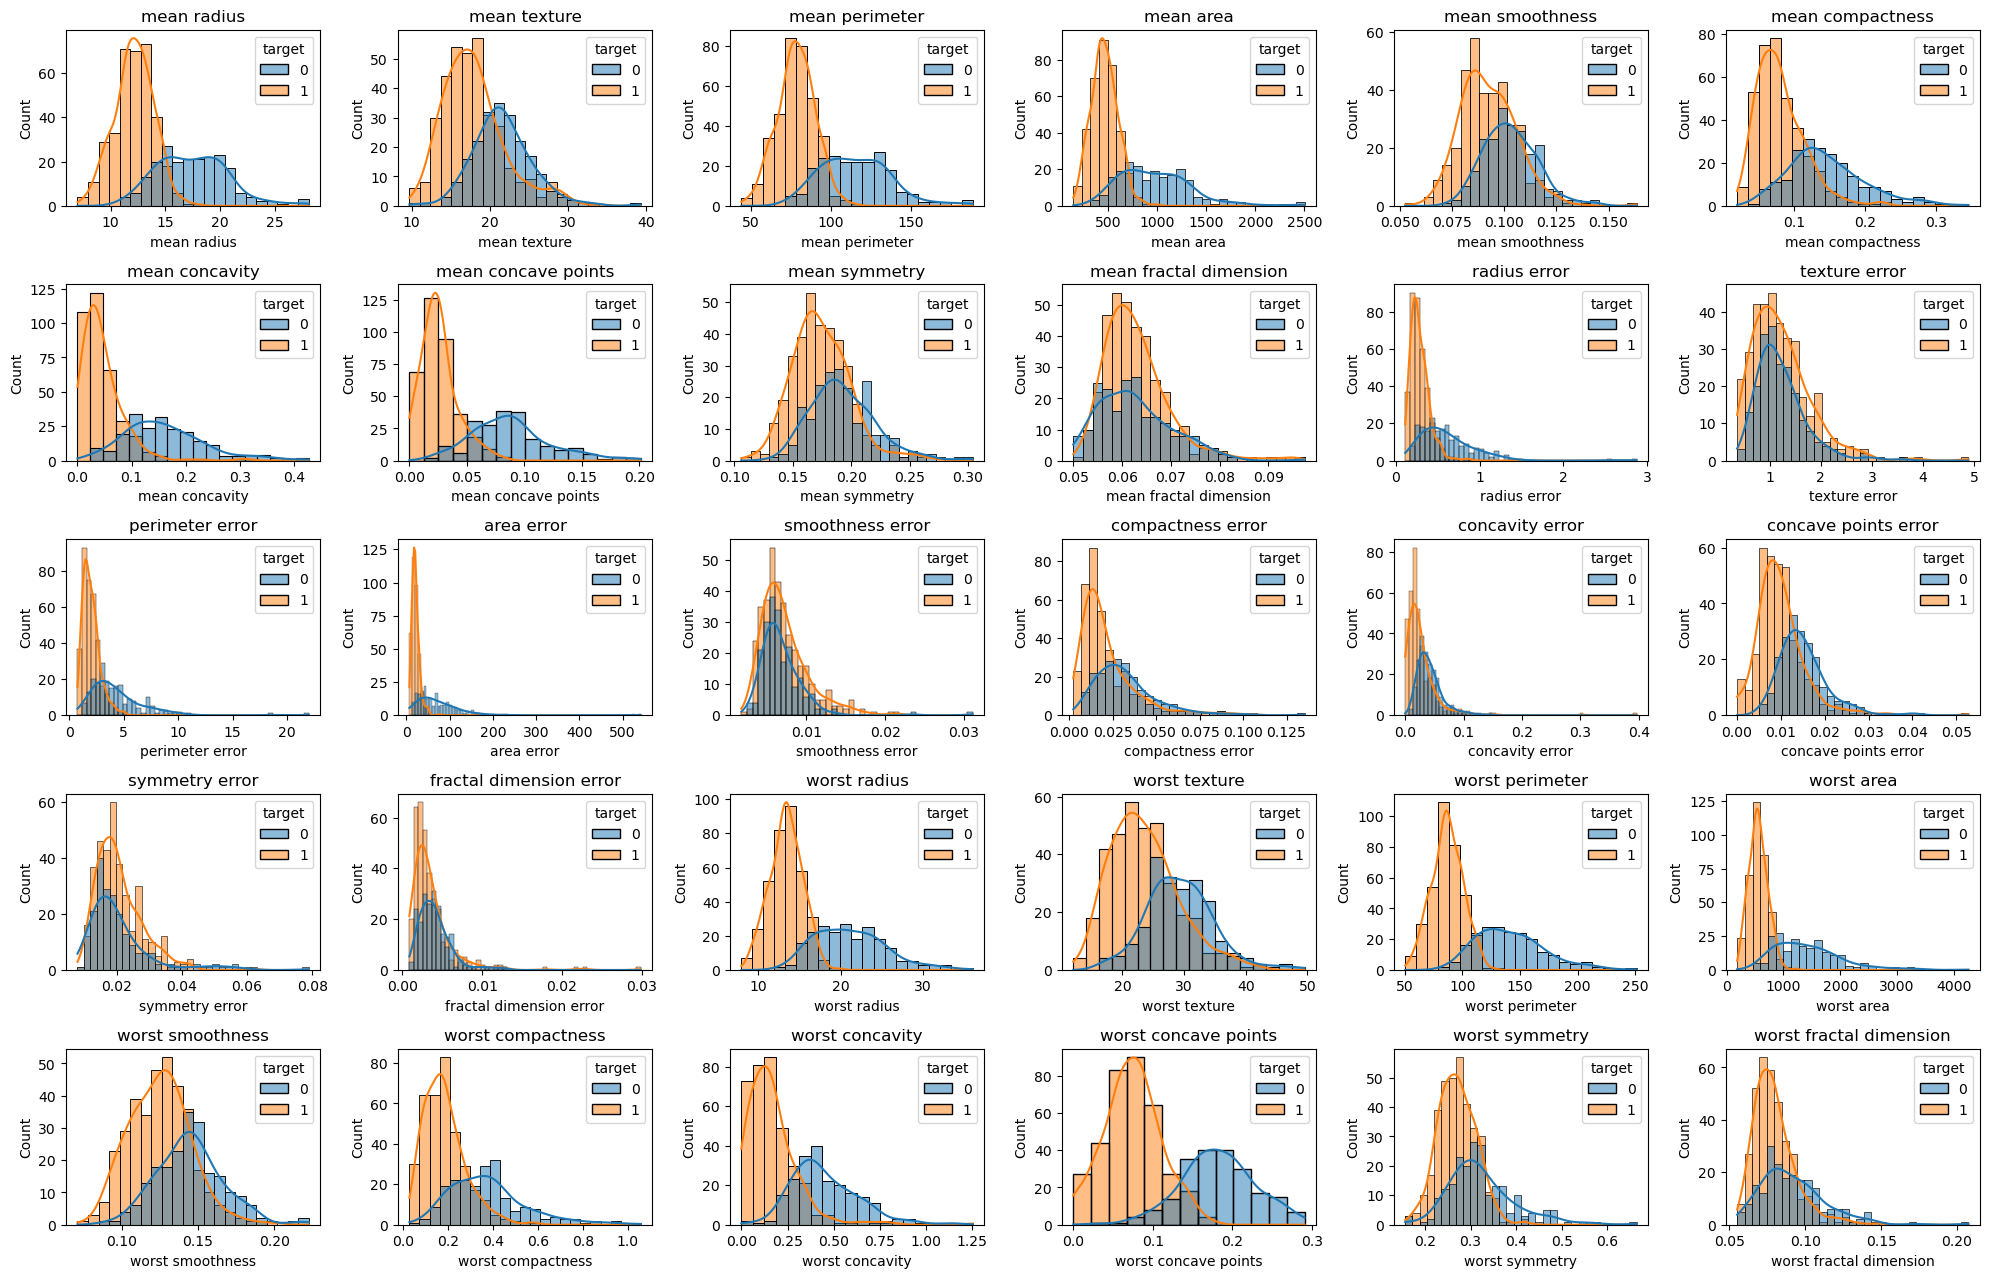

In [264]:
# ditribution of data

plt.figure(figsize=(20, 15))
for index, column in enumerate(df.columns):
    if index <= 30 and column != "target":
        plt.subplot(6, 6, index + 1)
        sns.histplot(df, x=column, kde=True, hue="target")
        plt.title(column)                                   # Add title for each subplot
plt.tight_layout()                                           # Adjust layout to prevent overlapping
plt.show()

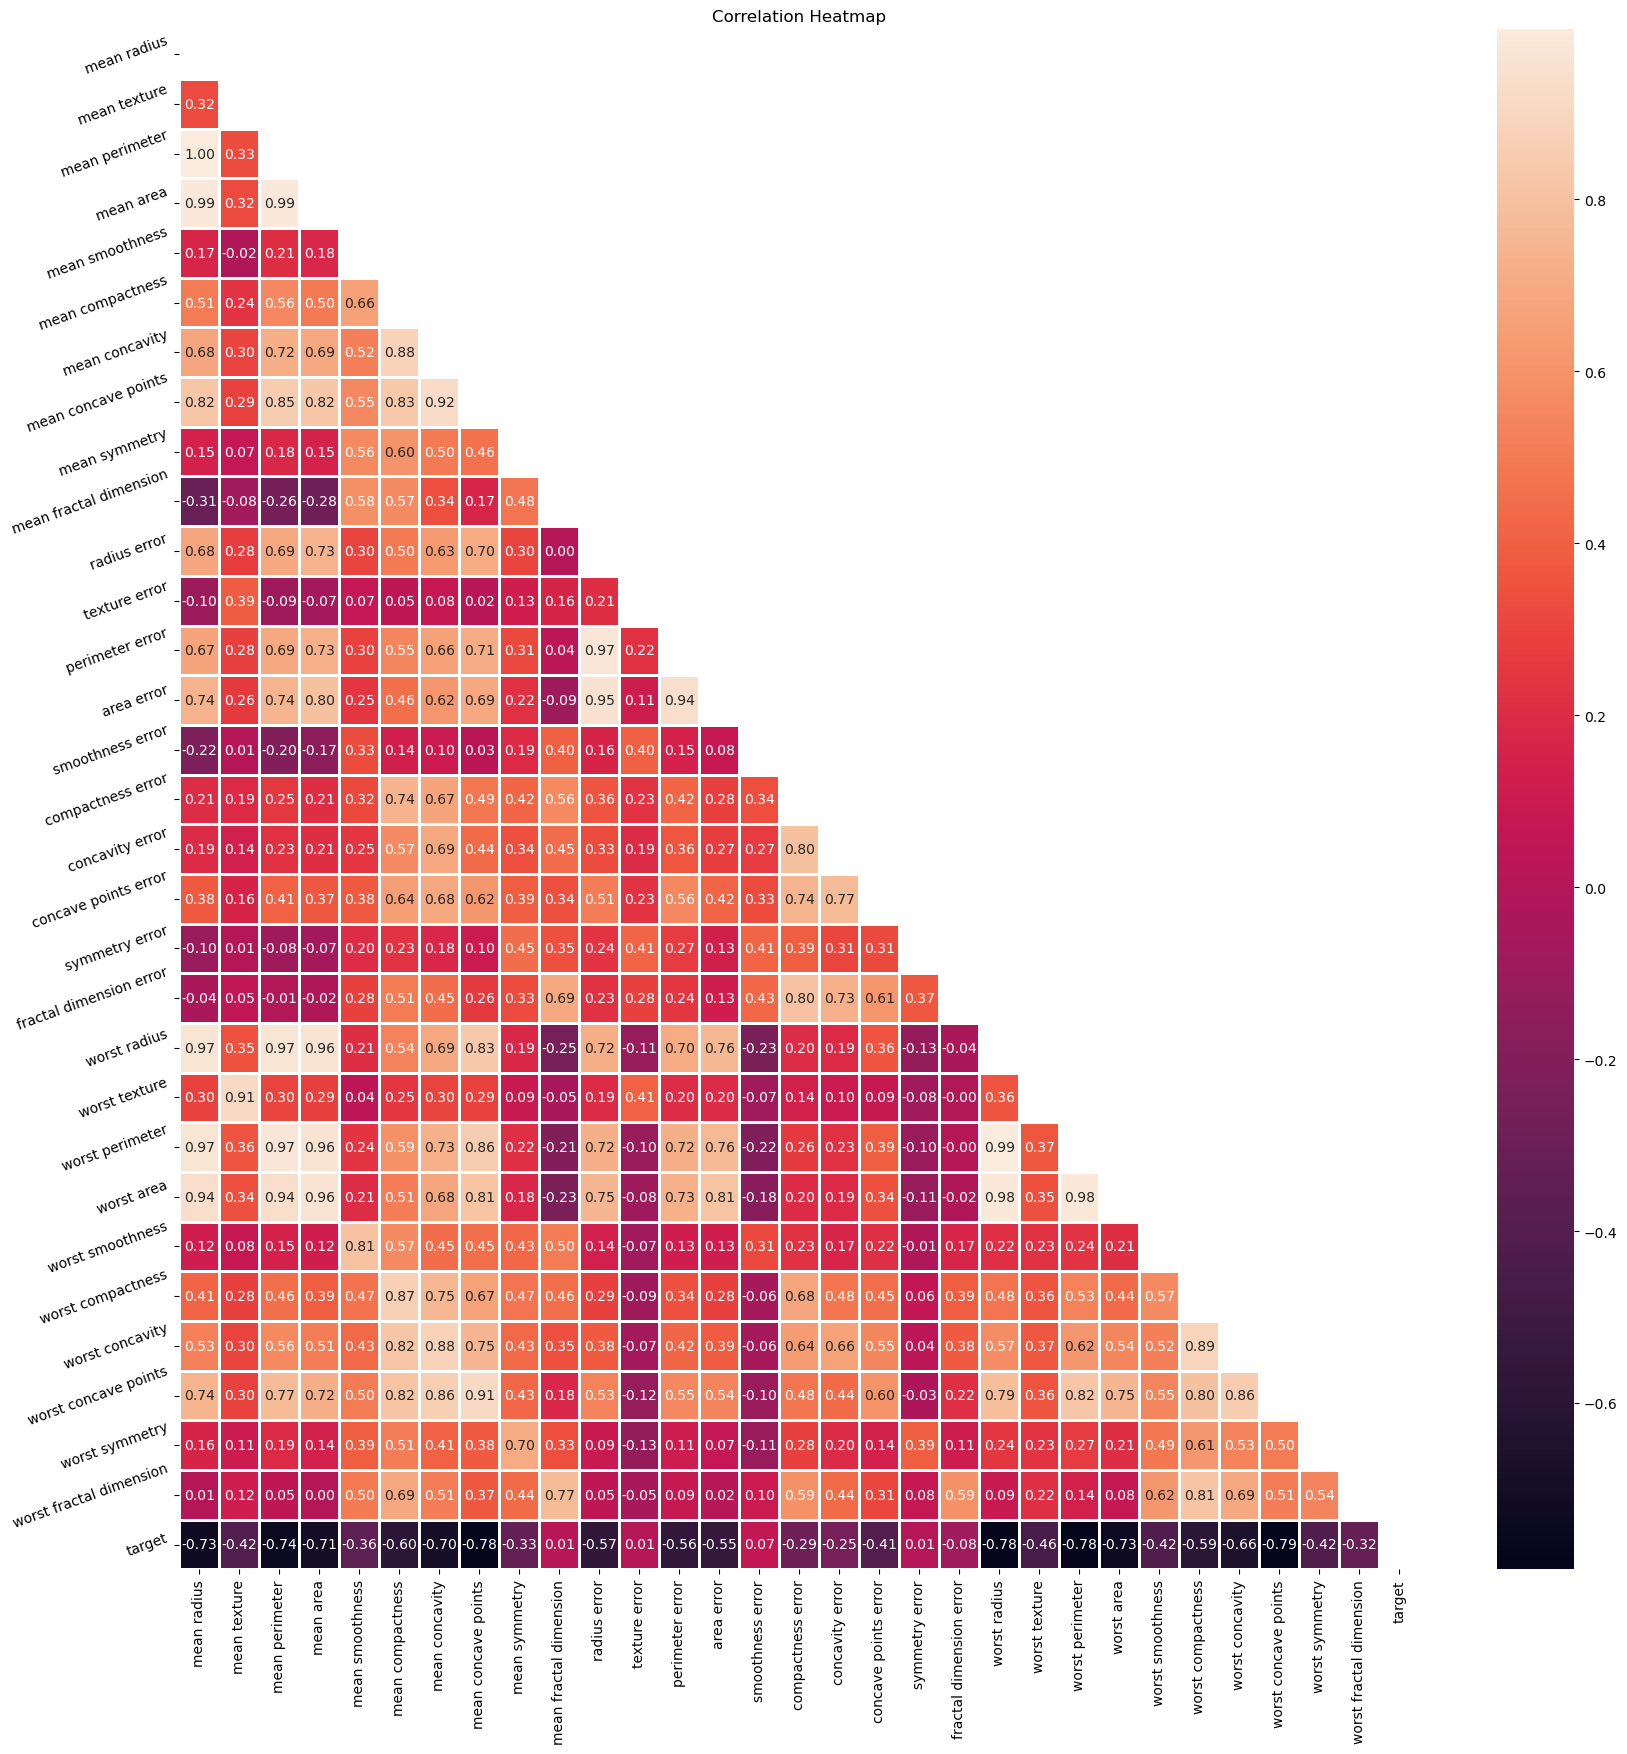

In [270]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(20, 20))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask= mask, linewidths=1, annot=True, fmt = ".2f")

# Add title
plt.title('Correlation Heatmap')

# Rotate y-axis labels for better readability
plt.yticks(rotation=20)

# Show plot
plt.show()

# PREPROCESSING

In [80]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df_features,df_target,test_size=0.2,random_state=100)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)
y_train=np.ravel(y_train)

In [83]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=data.feature_names)
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=data.feature_names)

# MODEL CREATION AND TESTING

1. LOGISTIC REGRESSION

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [234]:
model_lr=LogisticRegression()
model_lr.fit(X_train_scaled,y_train)
y_pred=model_lr.predict(X_test_Scaled)

In [235]:
print("**********************  Performance of a machine learning model   ***************************** ")
print()
print(f"model accuracy on train data      : {round(model_lr.score(X_train_scaled,y_train),4)*100} %")
print(f"model accuracy on test data       : {round(accuracy_score(y_test,y_pred),4)*100} %")

print()
print(f"Confusion Matrix \n {confusion_matrix(y_test,y_pred)}")
print()
print(f"Confusion Matrix \n {classification_report(y_test,y_pred)}")

**********************  Performance of a machine learning model   ***************************** 

model accuracy on train data      : 99.33999999999999 %
model accuracy on test data       : 97.37 %

Confusion Matrix 
 [[46  3]
 [ 0 65]]

Confusion Matrix 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.96      1.00      0.98        65

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



2.Decision TREE

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
model_dtc=DecisionTreeClassifier(random_state=10)
model_dtc.fit(X_train_scaled,y_train)
y_pred=model_dtc.predict(X_test_Scaled)

In [243]:
print("******************* Performance & Details of a machine learning model ************************** ")
print()
print(f"No of leaves in the tree is    :{model_dtc.get_n_leaves()}")
print(f"The depth of the tree is       :{model_dtc.get_depth()}")
print(f"model accuracy on TRAIN data   : {round(model_dtc.score(X_train_scaled,y_train),4)*100} %")
print(f"model accuracy on TEST data    : {round(accuracy_score(y_test,y_pred),4)*100} %")
print()
print(f"Confusion Matrix \n {confusion_matrix(y_test,y_pred_2)}")
print()
print(f"classification report \n {classification_report(y_test,y_pred_2,target_names=['malignant', 'benign'])}")


******************* Performance & Details of a machine learning model ************************** 

No of leaves in the tree is    :20
The depth of the tree is       :6
model accuracy on TRAIN data   : 100.0 %
model accuracy on TEST data    : 97.37 %

Confusion Matrix 
 [[46  3]
 [ 2 63]]

classification report 
               precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        49
      benign       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



[Text(0.6808035714285714, 0.9285714285714286, 'x[27] <= 0.535\ngini = 0.46\nsamples = 455\nvalue = [163, 292]\nclass = y[1]'),
 Text(0.5401785714285714, 0.7857142857142857, 'x[23] <= 0.193\ngini = 0.176\nsamples = 317\nvalue = [31, 286]\nclass = y[1]'),
 Text(0.36607142857142855, 0.6428571428571429, 'x[27] <= 0.298\ngini = 0.095\nsamples = 299\nvalue = [15, 284]\nclass = y[1]'),
 Text(0.19642857142857142, 0.5, 'x[13] <= -0.056\ngini = 0.049\nsamples = 277\nvalue = [7, 270]\nclass = y[1]'),
 Text(0.07142857142857142, 0.35714285714285715, 'x[21] <= 1.27\ngini = 0.008\nsamples = 259\nvalue = [1, 258]\nclass = y[1]'),
 Text(0.03571428571428571, 0.21428571428571427, 'gini = 0.0\nsamples = 242\nvalue = [0, 242]\nclass = y[1]'),
 Text(0.10714285714285714, 0.21428571428571427, 'x[21] <= 1.358\ngini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = y[1]'),
 Text(0.07142857142857142, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(0.14285714285714285, 0.0714285

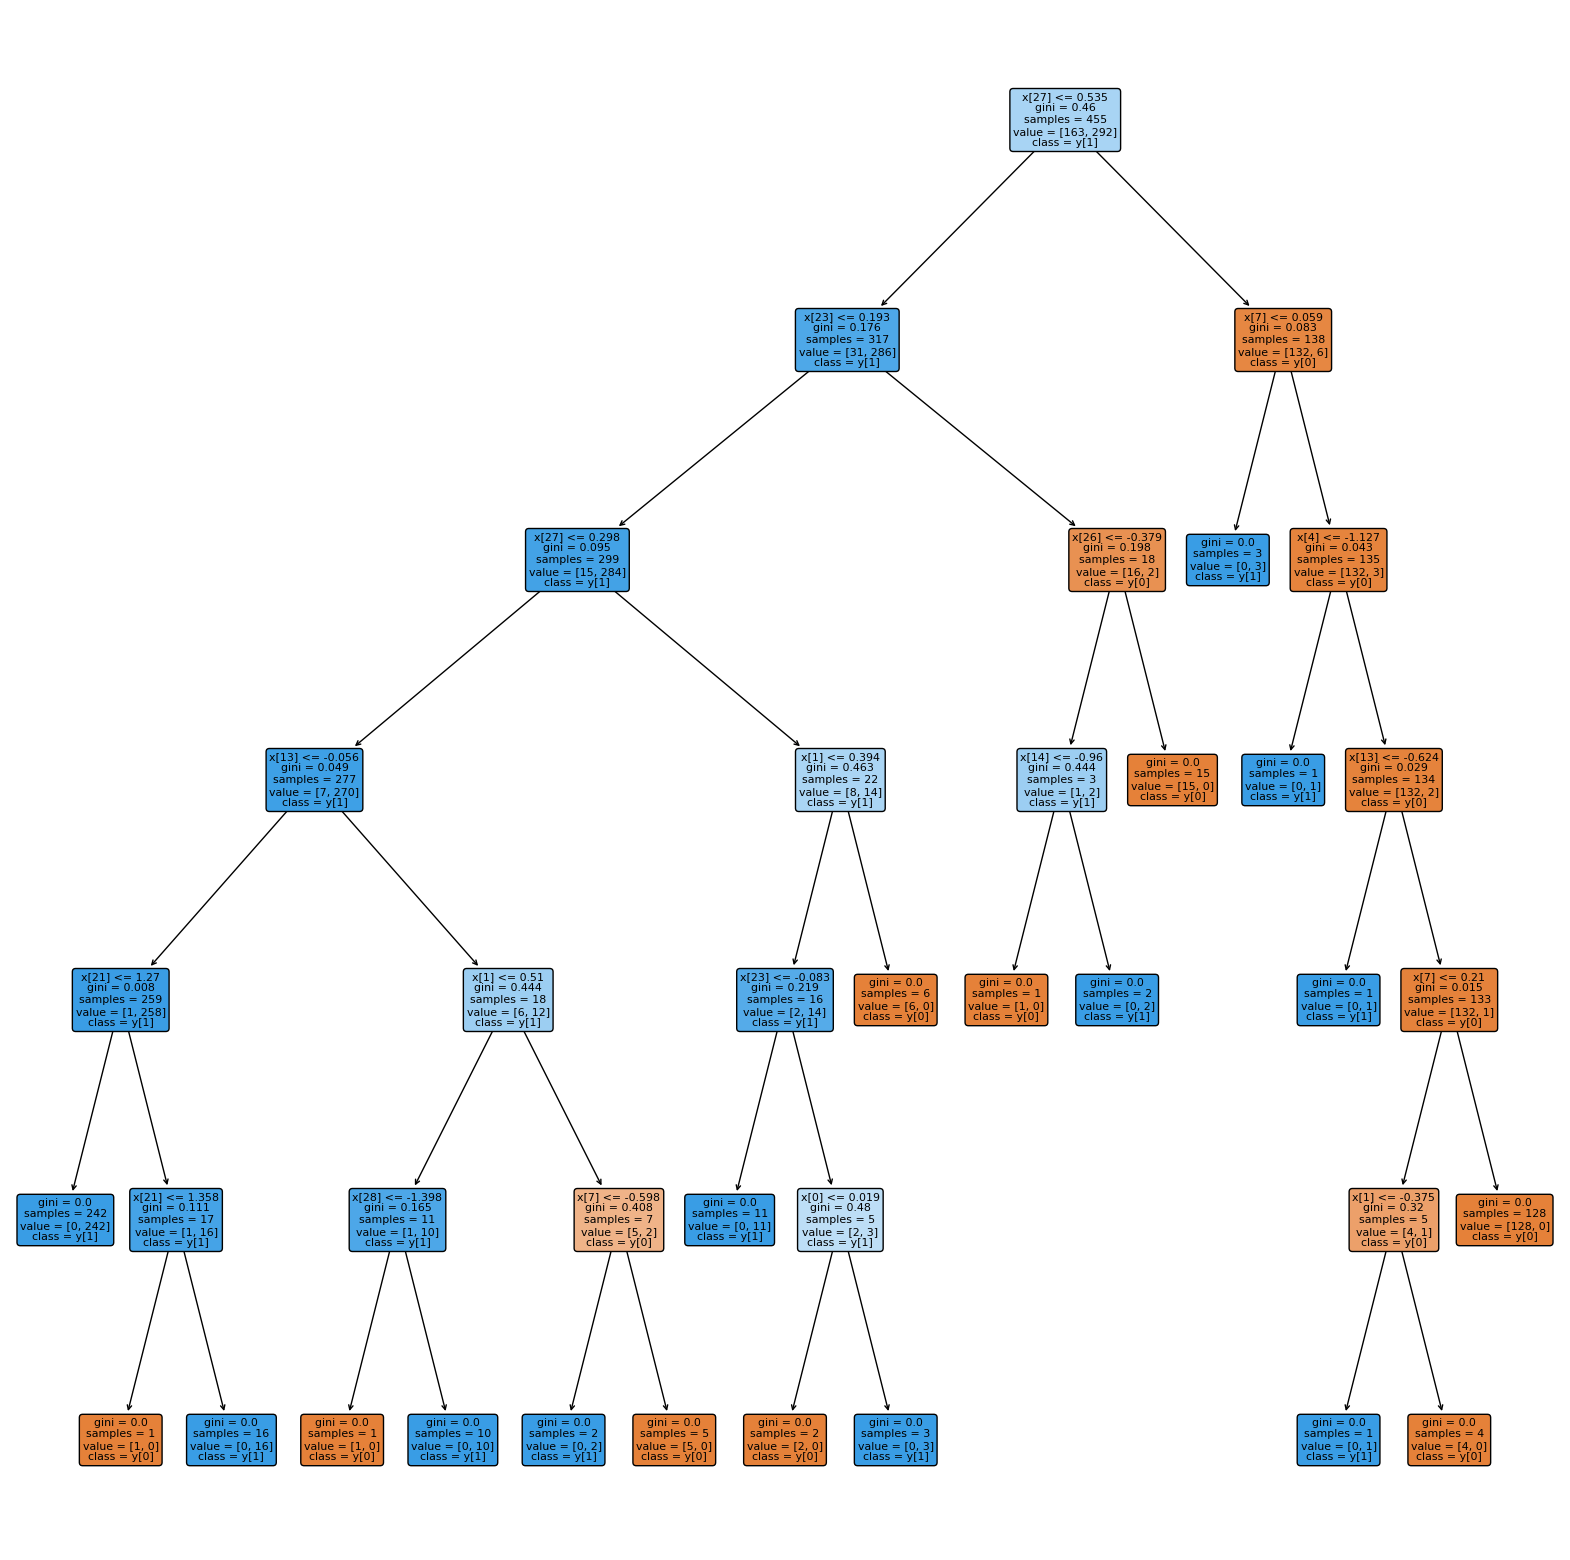

In [149]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dtc, filled=True,rounded=True,class_names=True)

Hyperparameter Turing

In [150]:
param_grid = {
    "min_samples_split": [i for i in range(1,10)],
    "min_samples_leaf": [i for i in range(1,10)],
    "max_depth": [i for i in range(1,7)]
}


In [151]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model_dtc,param_grid=param_grid,cv=5)

In [152]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [153]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 1}

In [180]:
model_dtc_2=DecisionTreeClassifier(
 max_depth= 4,
 min_samples_leaf= 1,
 min_samples_split= 1,
random_state=10)

In [227]:
model_dtc_2.fit(X_train_scaled,y_train)
y_pred=model_dtc_2.predict(X_test_Scaled)

In [241]:
print("*************** The details of decision tree MODEL after hyperparameter turing  ************************ ")
print()
print(f"No of leaves in the tree is    : {model_dtc_2.get_n_leaves()}")
print(f"The depth of the tree is       : {model_dtc_2.get_depth()}")
print(f"model accuracy on TRAIN data   : {round(model_dtc_2.score(X_train_scaled,y_train),4)*100} %")
print(f"model accuracy on TEST data    : {round(accuracy_score(y_test,y_pred),4)*100} %")
print()
print(f"Confusion Matrix \n {confusion_matrix(y_test,y_pred_2)}")
print()
print(f"classification report \n {classification_report(y_test,y_pred_2,target_names=['malignant', 'benign'])}")


*************** The details of decision tree MODEL after hyperparameter turing  ************************ 

No of leaves in the tree is    : 11
The depth of the tree is       : 4
model accuracy on TRAIN data   : 97.8 %
model accuracy on TEST data    : 97.37 %

Confusion Matrix 
 [[46  3]
 [ 2 63]]

classification report 
               precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        49
      benign       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



[Text(0.5972222222222222, 0.9, 'x[27] <= 0.535\ngini = 0.46\nsamples = 455\nvalue = [163, 292]'),
 Text(0.4166666666666667, 0.7, 'x[23] <= 0.193\ngini = 0.176\nsamples = 317\nvalue = [31, 286]'),
 Text(0.2222222222222222, 0.5, 'x[27] <= 0.298\ngini = 0.095\nsamples = 299\nvalue = [15, 284]'),
 Text(0.1111111111111111, 0.3, 'x[13] <= -0.056\ngini = 0.049\nsamples = 277\nvalue = [7, 270]'),
 Text(0.05555555555555555, 0.1, 'gini = 0.008\nsamples = 259\nvalue = [1, 258]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= 0.394\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.2777777777777778, 0.1, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.3888888888888889, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6111111111111112, 0.5, 'x[26] <= -0.379\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.5555555555555556, 0.3, 'x[16] <= -0.744\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.

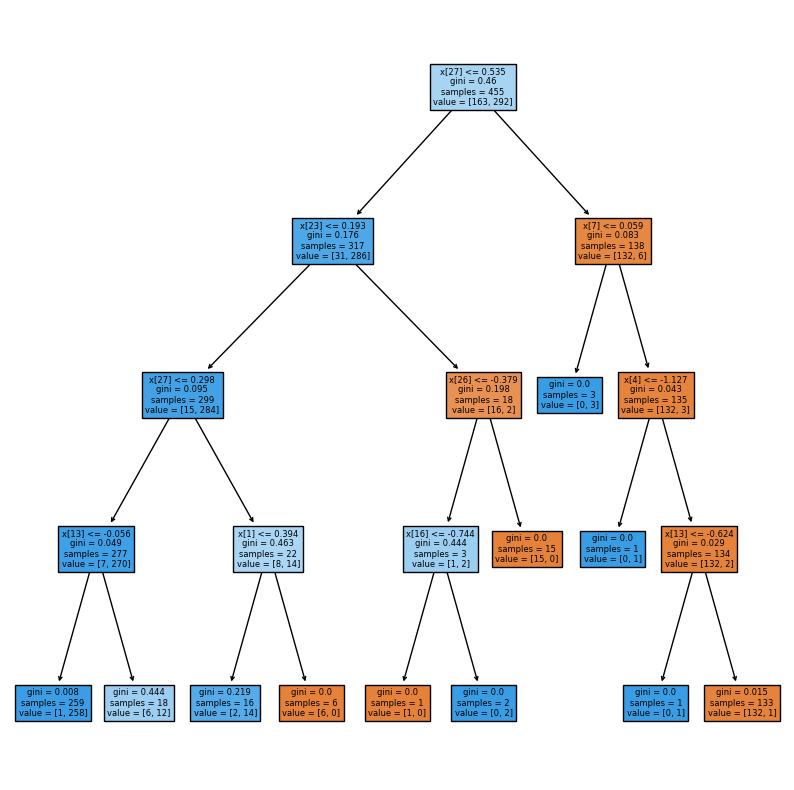

In [185]:
plt.figure(figsize=(10,10))
plot_tree(model_dtc_2,filled=True)

3.Random Forest Classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier

model_forest=RandomForestClassifier(n_estimators=100, criterion='gini',random_state=15)
model_forest.fit(X_train_scaled,y_train)
y_pred=model_forest.predict(X_test_Scaled)

In [245]:
print("**********************  Details of MODEL   ***************************** ")
print()
print(f"model accuracy on train data      : {round(model_forest.score(X_train_scaled,y_train),4)*100} %")
print(f"model accuracy on test data       : {round(accuracy_score(y_test,y_pred),4)*100} %")
print()
print(f"Confusion Matrix \n {confusion_matrix(y_test,y_pred_2)}")
print()
print(f"classification report \n {classification_report(y_test,y_pred_2,target_names=['malignant', 'benign'])}")

**********************  Details of MODEL   ***************************** 

model accuracy on train data      : 100.0 %
model accuracy on test data       : 97.37 %

Confusion Matrix 
 [[46  3]
 [ 2 63]]

classification report 
               precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        49
      benign       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



4. SVC

5.XGBOOST